In [6]:
!pip install riotwatcher
# !pip install ft2font
# !conda install matplotlib

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [5]:
import pandas as pd
import matplotlib.pyplot as plt

ImportError: DLL load failed: The specified module could not be found.

In [4]:
import json

def get_keys(path):
    with open(path) as f:
        return json.load(f)

import sys,os
file_path = os.path.join(sys.path[0], ".secret/riotapi.json")

keys = get_keys(file_path)
API_Key = keys['API_Key']


In [5]:
from riotwatcher import LolWatcher, ApiError

lol_watcher = LolWatcher(API_Key)

my_region = 'na1'

me = lol_watcher.summoner.by_name(my_region, 'thereiswald0')
print(me)

{'id': 'CEZ_jABSxvR1TdixfaW3GYZHfPtG2tpzZif-D3wQX-mWiBtxEpdohABC5A', 'accountId': 'v6JbmY1B_bNB7bmSUXaSG_toYdT2NvPz0DLr6uzMOM9gfE21JLs-JrbE', 'puuid': 'fHYPY_kTTCySAwpml6J2kHgxoe3yBmiwjZvqK2piE4FkPSSYfdJqaKkzTj6SAecAfqzQaLbjFCLoTg', 'name': 'thereiswald0', 'profileIconId': 3543, 'revisionDate': 1615862860000, 'summonerLevel': 10}


In [7]:
# I haven't played any ranked games but here is how I could print them
my_ranked_stats = lol_watcher.league.by_summoner(my_region, me['id'])
print(my_ranked_stats)

[]


In [9]:
# First we get the latest version of the game from data dragon
versions = lol_watcher.data_dragon.versions_for_region(my_region)
champions_version = versions['n']['champion']

# Lets get some champions
current_champ_list = lol_watcher.data_dragon.champions(champions_version)
# print(current_champ_list)

Show the main champions that we all use and how they rank in each category. Then do simulations to help explain ap/mr, ad/armour. Finally show the effect of items. Item spike in damage, item percentage of stats at different levels, fully spec'd out what does tha mean.

In [12]:
my_matches = lol_watcher.match.matchlist_by_account(my_region, me['accountId'])

# fetch last match detail
last_match = my_matches['matches'][0]
match_detail = lol_watcher.match.by_id(my_region, last_match['gameId'])

participants = []
for row in match_detail['participants']:
    participants_row = {}
    participants_row['champion'] = row['championId']
    participants_row['spell1'] = row['spell1Id']
    participants_row['spell2'] = row['spell2Id']
    participants_row['win'] = row['stats']['win']
    participants_row['kills'] = row['stats']['kills']
    participants_row['deaths'] = row['stats']['deaths']
    participants_row['assists'] = row['stats']['assists']
    participants_row['totalDamageDealt'] = row['stats']['totalDamageDealt']
    participants_row['goldEarned'] = row['stats']['goldEarned']
    participants_row['champLevel'] = row['stats']['champLevel']
    participants_row['totalMinionsKilled'] = row['stats']['totalMinionsKilled']
    participants_row['item0'] = row['stats']['item0']
    participants_row['item1'] = row['stats']['item1']
    participants.append(participants_row)
df = pd.DataFrame(participants)
df

,assists,champLevel,champion,deaths,goldEarned,item0,item1,kills,spell1,spell2,totalDamageDealt,totalMinionsKilled,win
0,5,17,18,3,9924,1055,3006,0,6,7,135416,136,True
1,7,16,25,6,10208,3853,4005,3,6,7,81147,48,True
2,1,14,122,8,10615,1054,3047,7,6,4,96784,84,True
3,2,17,21,6,11008,3042,3006,3,7,4,132068,119,True
4,4,17,54,2,12225,1054,3075,5,4,7,166684,145,True
5,4,16,81,4,12868,3042,3077,10,0,0,143094,171,False
6,6,17,102,3,10800,1042,1053,4,0,0,137290,138,False
7,0,16,55,5,10204,3057,3153,4,0,0,100067,118,False
8,11,15,267,2,9763,0,4005,3,0,0,59359,55,False
9,3,16,86,4,10933,3133,6631,4,0,0,138816,185,False


In [13]:
# check league's latest version
latest = lol_watcher.data_dragon.versions_for_region(my_region)['n']['champion']
# Lets get some champions static information
static_champ_list = lol_watcher.data_dragon.champions(latest, False, 'en_US')

# champ static list data to dict for looking up
champ_dict = {}
for key in static_champ_list['data']:
    row = static_champ_list['data'][key]
    champ_dict[row['key']] = row['id']
for row in participants:
    print(str(row['champion']) + ' ' + champ_dict[str(row['champion'])])
    row['championName'] = champ_dict[str(row['champion'])]

# print dataframe
df = pd.DataFrame(participants)
df

18 Tristana
25 Morgana
122 Darius
21 MissFortune
54 Malphite
81 Ezreal
102 Shyvana
55 Katarina
267 Nami
86 Garen


,assists,champLevel,champion,championName,deaths,goldEarned,item0,item1,kills,spell1,spell2,totalDamageDealt,totalMinionsKilled,win
0,5,17,18,Tristana,3,9924,1055,3006,0,6,7,135416,136,True
1,7,16,25,Morgana,6,10208,3853,4005,3,6,7,81147,48,True
2,1,14,122,Darius,8,10615,1054,3047,7,6,4,96784,84,True
3,2,17,21,MissFortune,6,11008,3042,3006,3,7,4,132068,119,True
4,4,17,54,Malphite,2,12225,1054,3075,5,4,7,166684,145,True
5,4,16,81,Ezreal,4,12868,3042,3077,10,0,0,143094,171,False
6,6,17,102,Shyvana,3,10800,1042,1053,4,0,0,137290,138,False
7,0,16,55,Katarina,5,10204,3057,3153,4,0,0,100067,118,False
8,11,15,267,Nami,2,9763,0,4005,3,0,0,59359,55,False
9,3,16,86,Garen,4,10933,3133,6631,4,0,0,138816,185,False


In [14]:
champs = pd.DataFrame.from_dict(static_champ_list['data'])

In [15]:
champs.loc['stats']['Lux']

{'hp': 490,
 'hpperlevel': 85,
 'mp': 480,
 'mpperlevel': 23.5,
 'movespeed': 330,
 'armor': 19,
 'armorperlevel': 4,
 'spellblock': 30,
 'spellblockperlevel': 0.5,
 'attackrange': 550,
 'hpregen': 5.5,
 'hpregenperlevel': 0.55,
 'mpregen': 8,
 'mpregenperlevel': 0.8,
 'crit': 0,
 'critperlevel': 0,
 'attackdamage': 54,
 'attackdamageperlevel': 3.3,
 'attackspeedperlevel': 1,
 'attackspeed': 0.669}

In [55]:
champs

,Aatrox,Ahri,Akali,Alistar,Amumu,Anivia,Annie,Aphelios,Ashe,AurelionSol,...,Yasuo,Yone,Yorick,Yuumi,Zac,Zed,Ziggs,Zilean,Zoe,Zyra
blurb,Once honored defenders of Shurima against the ...,Innately connected to the latent power of Rune...,Abandoning the Kinkou Order and her title of t...,Always a mighty warrior with a fearsome reputa...,Legend claims that Amumu is a lonely and melan...,Anivia is a benevolent winged spirit who endur...,"Dangerous, yet disarmingly precocious, Annie i...",Emerging from moonlight's shadow with weapons ...,"Iceborn warmother of the Avarosan tribe, Ashe ...",Aurelion Sol once graced the vast emptiness of...,...,"An Ionian of deep resolve, Yasuo is an agile s...","In life, he was Yone—half-brother of Yasuo, an...",The last survivor of a long-forgotten religiou...,"A magical cat from Bandle City, Yuumi was once...",Zac is the product of a toxic spill that ran t...,"Utterly ruthless and without mercy, Zed is the...","With a love of big bombs and short fuses, the ...","Once a powerful Icathian mage, Zilean became o...","As the embodiment of mischief, imagination, an...","Born in an ancient, sorcerous catastrophe, Zyr..."
id,Aatrox,Ahri,Akali,Alistar,Amumu,Anivia,Annie,Aphelios,Ashe,AurelionSol,...,Yasuo,Yone,Yorick,Yuumi,Zac,Zed,Ziggs,Zilean,Zoe,Zyra
image,"{'full': 'Aatrox.png', 'sprite': 'champion0.pn...","{'full': 'Ahri.png', 'sprite': 'champion0.png'...","{'full': 'Akali.png', 'sprite': 'champion0.png...","{'full': 'Alistar.png', 'sprite': 'champion0.p...","{'full': 'Amumu.png', 'sprite': 'champion0.png...","{'full': 'Anivia.png', 'sprite': 'champion0.pn...","{'full': 'Annie.png', 'sprite': 'champion0.png...","{'full': 'Aphelios.png', 'sprite': 'champion0....","{'full': 'Ashe.png', 'sprite': 'champion0.png'...","{'full': 'AurelionSol.png', 'sprite': 'champio...",...,"{'full': 'Yasuo.png', 'sprite': 'champion4.png...","{'full': 'Yone.png', 'sprite': 'champion4.png'...","{'full': 'Yorick.png', 'sprite': 'champion4.pn...","{'full': 'Yuumi.png', 'sprite': 'champion4.png...","{'full': 'Zac.png', 'sprite': 'champion4.png',...","{'full': 'Zed.png', 'sprite': 'champion4.png',...","{'full': 'Ziggs.png', 'sprite': 'champion5.png...","{'full': 'Zilean.png', 'sprite': 'champion5.pn...","{'full': 'Zoe.png', 'sprite': 'champion5.png',...","{'full': 'Zyra.png', 'sprite': 'champion5.png'..."
info,"{'attack': 8, 'defense': 4, 'magic': 3, 'diffi...","{'attack': 3, 'defense': 4, 'magic': 8, 'diffi...","{'attack': 5, 'defense': 3, 'magic': 8, 'diffi...","{'attack': 6, 'defense': 9, 'magic': 5, 'diffi...","{'attack': 2, 'defense': 6, 'magic': 8, 'diffi...","{'attack': 1, 'defense': 4, 'magic': 10, 'diff...","{'attack': 2, 'defense': 3, 'magic': 10, 'diff...","{'attack': 6, 'defense': 2, 'magic': 1, 'diffi...","{'attack': 7, 'defense': 3, 'magic': 2, 'diffi...","{'attack': 2, 'defense': 3, 'magic': 8, 'diffi...",...,"{'attack': 8, 'defense': 4, 'magic': 4, 'diffi...","{'attack': 8, 'defense': 4, 'magic': 4, 'diffi...","{'attack': 6, 'defense': 6, 'magic': 4, 'diffi...","{'attack': 5, 'defense': 1, 'magic': 8, 'diffi...","{'attack': 3, 'defense': 7, 'magic': 7, 'diffi...","{'attack': 9, 'defense': 2, 'magic': 1, 'diffi...","{'attack': 2, 'defense': 4, 'magic': 9, 'diffi...","{'attack': 2, 'defense': 5, 'magic': 8, 'diffi...","{'attack': 1, 'defense': 7, 'magic': 8, 'diffi...","{'attack': 4, 'defense': 3, 'magic': 8, 'diffi..."
key,266,103,84,12,32,34,1,523,22,136,...,157,777,83,350,154,238,115,26,142,143
name,Aatrox,Ahri,Akali,Alistar,Amumu,Anivia,Annie,Aphelios,Ashe,Aurelion Sol,...,Yasuo,Yone,Yorick,Yuumi,Zac,Zed,Ziggs,Zilean,Zoe,Zyra
partype,Blood Well,Mana,Energy,Mana,Mana,Mana,Mana,Mana,Mana,Mana,...,Flow,Flow,Mana,Mana,None,Energy,Mana,Mana,Mana,Mana
stats,"{'hp': 580, 'hpperlevel': 90, 'mp': 0, 'mpperl...","{'hp': 526, 'hpperlevel': 92, 'mp': 418, 'mppe...","{'hp': 500, 'hpperlevel': 105, 'mp': 200, 'mpp...","{'hp': 600, 'hpperlevel': 106, 'mp': 350, 'mpp...","{'hp': 615, 'hpperlevel': 80, 'mp': 285, 'mppe...","{'hp':

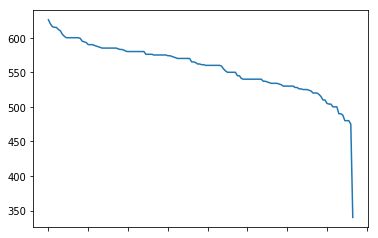

In [18]:
champ_stats = pd.DataFrame()
for champ in list(champs.columns):
#     champ_stats[champ] = champs.loc['stats'][champ]
#     champ_stats.index = list(champs.loc['stats'][champ].keys())
    champ_stats[champ] = champs.loc['stats'][champ].values()
champ_stats = champ_stats.set_index([pd.Index(list(champs.loc['stats'][champ].keys()))])
champ_stats = champ_stats.T # transpose so it's easier to manipulate the data
champ_stats = champ_stats.sort_values(by=['hp'], ascending=False)
champ_stats['hp'].plot()
# champ_stats

In [26]:
champ_stats = champ_stats.sort_values(by=['attackdamage'], ascending=True)

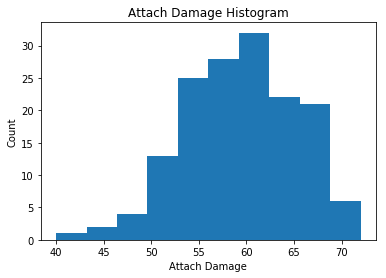

In [40]:
# plt.bar(champ_stats.index, champ_stats['attackdamage'])
plt.hist(champ_stats['attackdamage'], density=False, bins=10)  # density=False would make counts, True is probability
plt.ylabel('Count')
plt.xlabel('Attach Damage')
plt.title('Attach Damage Histogram');
plt.show()

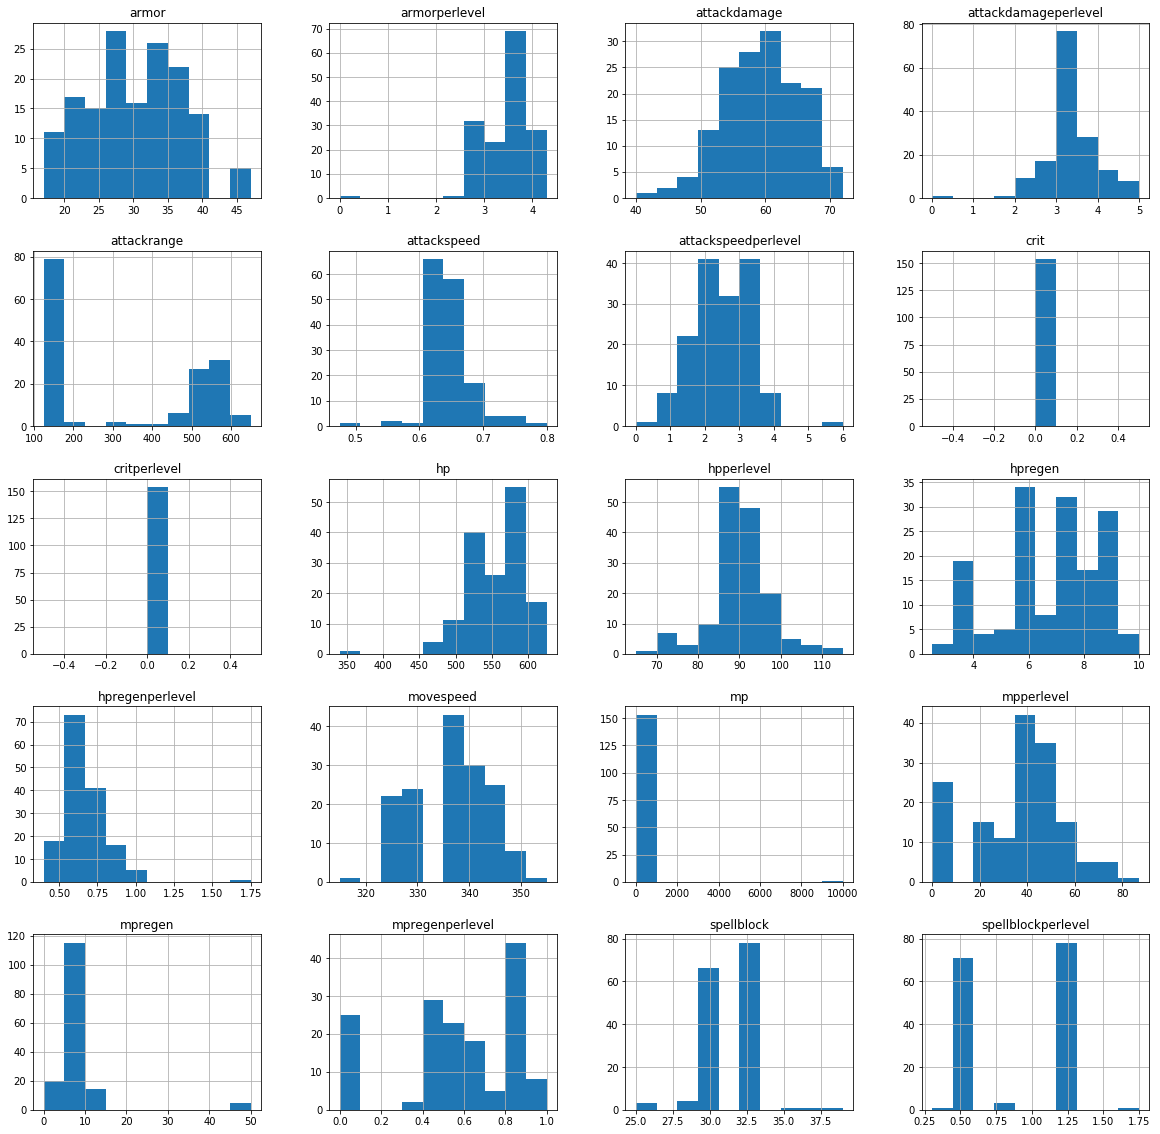

In [44]:
champ_stats.hist(figsize=(20,20))
plt.show()

In [45]:
champ_stats.describe()

,hp,hpperlevel,mp,mpperlevel,movespeed,armor,armorperlevel,spellblock,spellblockperlevel,attackrange,hpregen,hpregenperlevel,mpregen,mpregenperlevel,crit,critperlevel,attackdamage,attackdamageperlevel,attackspeedperlevel,attackspeed
count,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.0,154.0,154.000000,154.000000,154.000000,154.000000
mean,556.424675,88.954545,375.408831,36.629870,336.155844,29.805195,3.467208,31.021429,0.891558,325.032468,6.592532,0.665909,8.262078,0.550584,0.0,0.0,59.365974,3.234621,2.488682,0.646597
std,37.302384,7.214130,789.468244,20.004314,7.439631,6.703894,0.457629,1.599753,0.379663,194.621719,1.788661,0.160443,8.233780,0.290646,0.0,0.0,5.945627,0.653715,0.851860,0.035254
min,340.000000,65.000000,0.000000,0.000000,315.000000,17.000000,0.000000,25.000000,0.300000,125.000000,2.500000,0.400000,0.000000,0.000000,0.0,0.0,40.000000,0.000000,0.000000,0.475000
25%,534.000000,85.000000,280.000000,25.250000,330.000000,24.250000,3.250000,30.000000,0.500000,125.000000,5.500000,0.550000,6.500000,0.400000,0.0,0.0,55.000000,3.000000,2.000000,0.625000
50%,561.500000,90.000000,326.500000,40.000000,335.000000,29.000000,3.500000,32.000000,1.250000,175.000000,7.000000,0.600000,7.585000,0.600000,0.0,0.0,60.000000,3.125800,2.500000,0.640000
75%,581.600000,93.000000,376.650000,50.000000,340.000000,35.000000,3.750000,32.000000,1.250000,525.000000,8.000000,0.750000,8.000000,0.800000,0.0,0.0,64.000000,3.500000,3.175000,0.658000
max,626.000000,115.000000,10000.000000,87.000000,355.000000,47.000000,4.300000,39.000000,1.750000,650.000000,10.000000,1.750000,50.000000,1.000000,0.0,0.0,72.000000,5.000000,6.000000,0.800000


# Word Cloud

As someone new to the game, I don't have a grasp on the lore of League of Legends. At glance I want to understand it, and a good option for that is a word cloud of the character blurbs.

In [56]:
!pip install wordcloud

    100% |████████████████████████████████| 225kB 4.3MB/s 
  Running setup.py bdist_wheel for wordcloud ... done
  Stored in directory: /Users/jeremywalsh/Library/Caches/pip/wheels/bf/18/33/c6d0e1bb532e0587da731a02d990e62c483c8e49741e0c4bf3
Successfully built wordcloud


In [57]:
from wordcloud import WordCloud, STOPWORDS

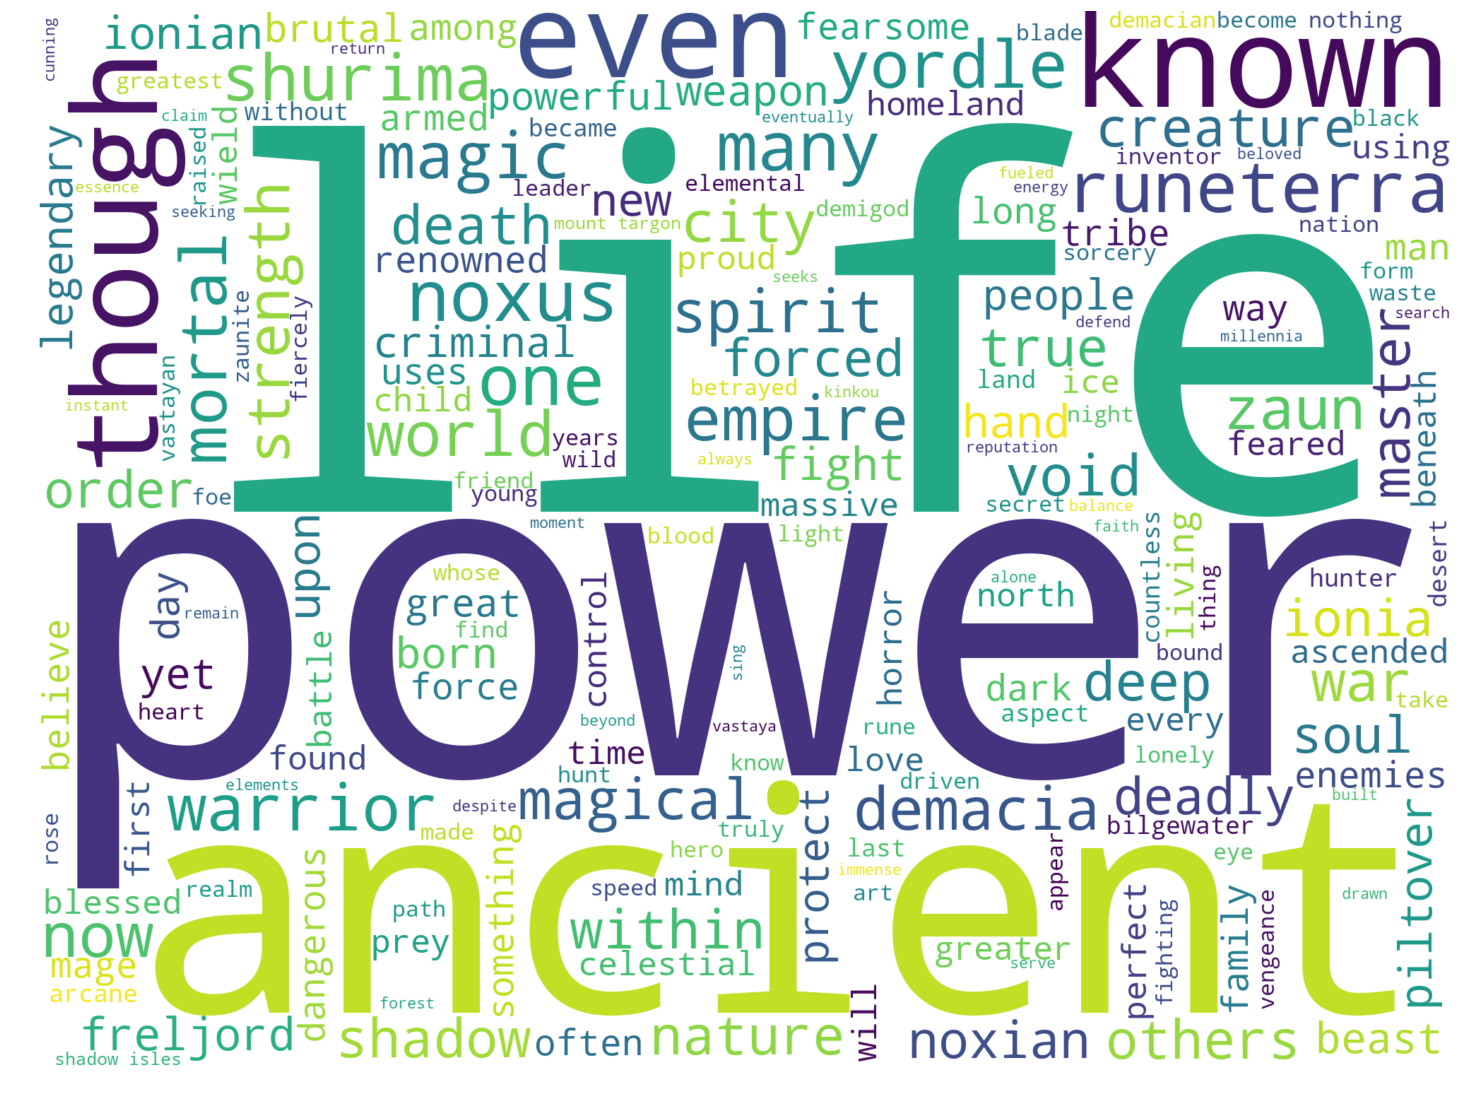

In [65]:
comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 

for val in champs.T['blurb']: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wc_width = 20
wc_height = 15
wordcloud = WordCloud(width = wc_width*100, height = wc_height*100, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (wc_width, wc_height), facecolor = None) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 